# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [25]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [26]:
df["Preco_Normal"].mean()

2070.9972899728996

In [27]:
soma_preco_normal = df["Preco_Normal"].sum()
quantidade_de_registros = len(df["Preco_Normal"])
media_preco_normal = soma_preco_normal / quantidade_de_registros

print("Média de Preço Normal:", media_preco_normal)

Média de Preço Normal: 2070.9972899728996


In [28]:
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [29]:
df["Preco_Normal"].median()

1269.0

In [30]:
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias: 
#Acima da Mediana: comidas-preparadas, lácteos, congelados, beleza e cuidado pessoal, frutas; Abaixo da Mediana: verduras, instantâneos e sopas.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [31]:
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio_padrao_por_categoria

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2210.041719
1,comidas-preparadas,2019.911428
2,congelados,2111.539896
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
5,lacteos,3925.816164
6,verduras,1012.699625


In [32]:
df.describe()

,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,2070.997290,522.269196,372.257453,68.109304
std,2961.257627,1339.559852,1239.475017,241.158310
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,0.000000,0.000000
75%,2849.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


Digite nesse campo o comportamento que você identificou.

Nas categorias com maior desvio padrão, existe um comportamento em que a média tende a ser mais elevada em relação à mediana, o que sugere a presença de valores altos que distorcem a média (outliers), deixando-a acima do valor da mediana. Esse comportamento de dados com outliers, onde alguns produtos possuem preços muito acima dos demais na mesma categoria, aumentando o desvio padrão. Com isso, as categorias com maior desvio, a média está consistentemente mais alta que a mediana, mostrando a influência de "valores extremos".

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

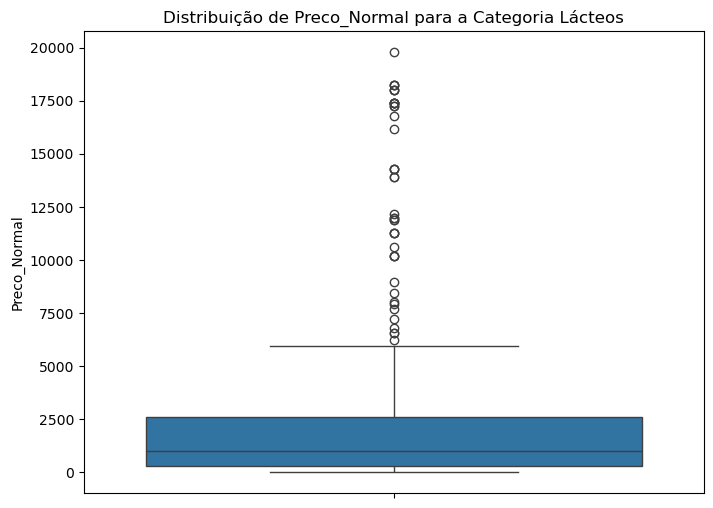

In [33]:
categoria_maior_desvio = df.loc[df['Categoria'] == 'lacteos']

plt.figure(figsize=(8, 6))

sns.boxplot(data=categoria_maior_desvio, y='Preco_Normal')

plt.title('Distribuição de Preco_Normal para a Categoria Lácteos')
plt.ylabel('Preco_Normal')

plt.show()

A distribuição dos dados para a categoria "lácteos", de acordo com o boxplot acima, mostra uma grande variação nos preços, com uma "assimetria" onde a média é influenciada por valores elevados. Isso faz com que tenha presença de vários outliers acima do limite superior, indicando que exista produtos com preços maiores que o restante de forma significativa. Esses outliers sugerem que, apesar da concentração da maioria dos preços em uma faixa específica, os valores extremos elevam a média da categoria, resultando em um desvio padrão alto.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [34]:
# Seu código aqui
df["Desconto"].mean()

68.10930442637759

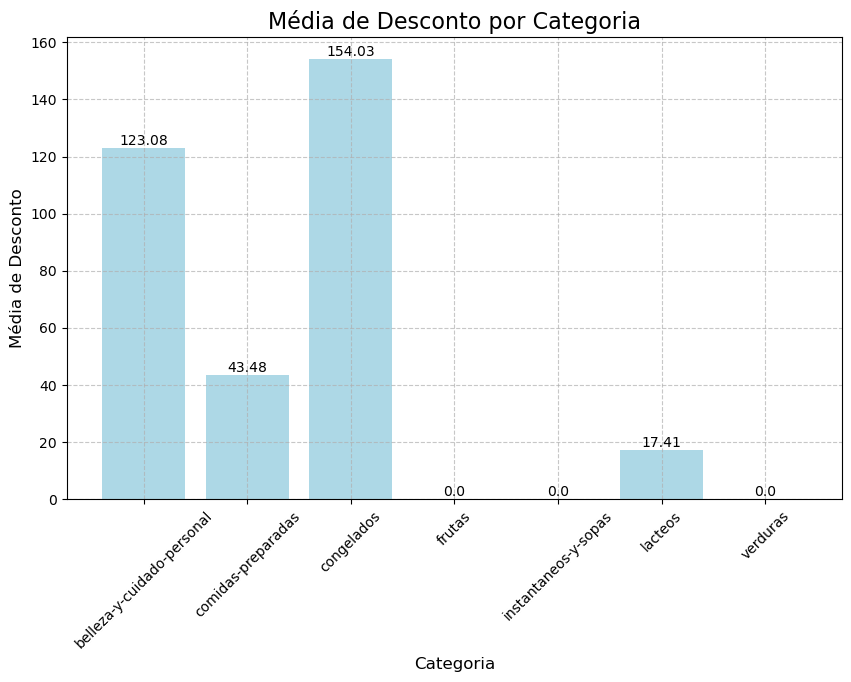

In [35]:
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(media_desconto_por_categoria.index, media_desconto_por_categoria, color='lightblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha='center', va='bottom', fontsize=10)

plt.title('Média de Desconto por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Média de Desconto', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

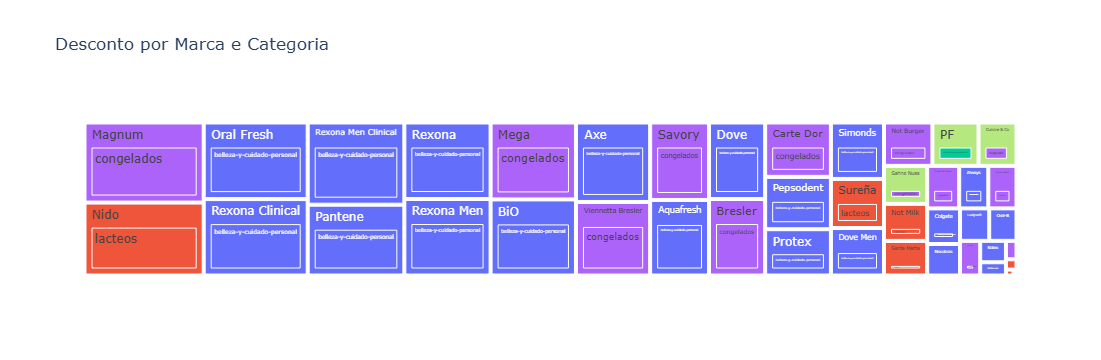

In [36]:
desconto_por_marca_categoria = df.groupby(['Marca', 'Categoria'])['Desconto'].mean().reset_index()

fig = px.treemap(desconto_por_marca_categoria,
                 path=['Marca', 'Categoria'],
                 values='Desconto',
                 title='Desconto por Marca e Categoria',
                 color='Categoria')

fig.show()

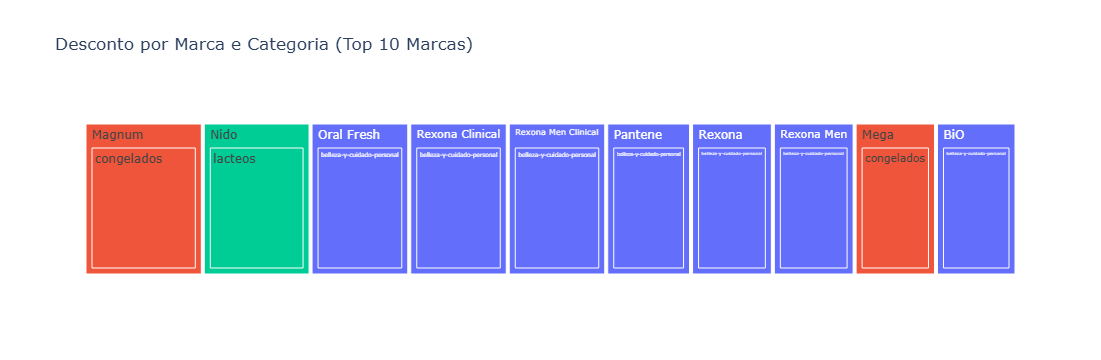

In [37]:
desconto_por_marca_categoria = df.groupby(['Marca', 'Categoria'])['Desconto'].mean().reset_index()

top_10_marcas = desconto_por_marca_categoria.groupby('Marca')['Desconto'].mean().nlargest(10).index
top_10_desconto_por_marca_categoria = desconto_por_marca_categoria[desconto_por_marca_categoria['Marca'].isin(top_10_marcas)]

fig = px.treemap(top_10_desconto_por_marca_categoria,
                 path=['Marca', 'Categoria'],
                 values='Desconto',
                 title='Desconto por Marca e Categoria (Top 10 Marcas)',
                 color='Categoria')
fig.show()